"""

@Author: Rikesh Chhetri

@Date: 2021-08-18

@Last Modified by: Rikesh Chhetri

@Last Modified time: 2021-08-18 07:03:30

@Title : Program to create a dataframe from cpu log data.csv file using pyspark library,
         and perform different different operations and also do visualization of the result.

"""

In [2]:
from pyspark.sql import *
from pyspark.sql import functions as func
spark = SparkSession.builder.getOrCreate()

21/08/19 13:55:25 WARN Utils: Your hostname, Shadow-coder resolves to a loopback address: 127.0.0.1; using 192.168.0.11 instead (on interface wlo1)
21/08/19 13:55:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/08/19 13:55:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
df = spark.read.csv("hdfs://localhost:9000/Spark_Sql_Task/*.csv",header=True)
df2 = df.select("user_name","DateTime","keyboard","mouse")

In [4]:
# 1) Display users and their record counts
df10 = df2.groupBy("user_name").count()

#  Display users and their record counts


In [5]:
df10.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  569|
|sharlawar77@gmail...|  580|
|rahilstar11@gmail...|  551|
|deepshukla292@gma...|  565|
|  iamnzm@outlook.com|  614|
|markfernandes66@g...|  508|
|damodharn21@gmail...|  253|
|bhagyashrichalke2...|  482|
+--------------------+-----+



# Finding users with highest number of average hours

In [6]:
df.createOrReplaceTempView("view1")
df1 = spark.sql("select user_name from view1 where keyboard != 0 or mouse != 0").groupBy("user_name").count()
df1.show(truncate=False)

21/08/19 13:55:40 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------------------------+-----+
|user_name                   |count|
+----------------------------+-----+
|salinabodale73@gmail.com    |436  |
|sharlawar77@gmail.com       |457  |
|rahilstar11@gmail.com       |399  |
|deepshukla292@gmail.com     |475  |
|iamnzm@outlook.com          |459  |
|markfernandes66@gmail.com   |389  |
|damodharn21@gmail.com       |191  |
|bhagyashrichalke21@gmail.com|361  |
+----------------------------+-----+



In [7]:
df3 = df1.createOrReplaceTempView("hour_view")


In [8]:
df4 = spark.sql("select user_name,count,((((count-1)*5)*60)/6) as avg_secs from hour_view")

In [9]:
df4.show(truncate=False)

+----------------------------+-----+--------+
|user_name                   |count|avg_secs|
+----------------------------+-----+--------+
|salinabodale73@gmail.com    |436  |21750.0 |
|sharlawar77@gmail.com       |457  |22800.0 |
|rahilstar11@gmail.com       |399  |19900.0 |
|deepshukla292@gmail.com     |475  |23700.0 |
|iamnzm@outlook.com          |459  |22900.0 |
|markfernandes66@gmail.com   |389  |19400.0 |
|damodharn21@gmail.com       |191  |9500.0  |
|bhagyashrichalke21@gmail.com|361  |18000.0 |
+----------------------------+-----+--------+



In [10]:
from pyspark.sql.functions import *
highest_avg_hour = df4.withColumn("average_hours", concat(
            floor(col("avg_secs") % 86400 / 3600), lit(":"),
            floor((col("avg_secs") % 86400) % 3600 / 60), lit(""),
           
        ))\
    .drop("avg_secs")

In [11]:
highest_avg_hour.show(truncate=False)

+----------------------------+-----+-------------+
|user_name                   |count|average_hours|
+----------------------------+-----+-------------+
|salinabodale73@gmail.com    |436  |6:2          |
|sharlawar77@gmail.com       |457  |6:20         |
|rahilstar11@gmail.com       |399  |5:31         |
|deepshukla292@gmail.com     |475  |6:35         |
|iamnzm@outlook.com          |459  |6:21         |
|markfernandes66@gmail.com   |389  |5:23         |
|damodharn21@gmail.com       |191  |2:38         |
|bhagyashrichalke21@gmail.com|361  |5:0          |
+----------------------------+-----+-------------+



# Finding users with lowest number of average hours

In [12]:
from pyspark.sql.functions import *
lowest_avg_hour = df4.withColumn("average_hours", concat(
            floor(col("avg_secs") % 86400 / 3600), lit(":"),
            floor((col("avg_secs") % 86400) % 3600 / 60), lit(""),
           
        ))\
    .drop("avg_secs")\
    .sort(asc("average_hours"))

In [13]:
lowest_avg_hour.show()

+--------------------+-----+-------------+
|           user_name|count|average_hours|
+--------------------+-----+-------------+
|damodharn21@gmail...|  191|         2:38|
|bhagyashrichalke2...|  361|          5:0|
|markfernandes66@g...|  389|         5:23|
|rahilstar11@gmail...|  399|         5:31|
|salinabodale73@gm...|  436|          6:2|
|sharlawar77@gmail...|  457|         6:20|
|  iamnzm@outlook.com|  459|         6:21|
|deepshukla292@gma...|  475|         6:35|
+--------------------+-----+-------------+



# Finding users with highest numbers of idle hours

In [14]:
df5 = spark.sql("select user_name from view1 where keyboard == 0 and mouse == 0").groupBy("user_name").count()
df5.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  133|
|sharlawar77@gmail...|  123|
|rahilstar11@gmail...|  152|
|deepshukla292@gma...|   90|
|  iamnzm@outlook.com|  155|
|markfernandes66@g...|  119|
|damodharn21@gmail...|   62|
|bhagyashrichalke2...|  121|
+--------------------+-----+



In [15]:
df5.createOrReplaceTempView('idle_hour_view')

In [16]:
df6 = spark.sql("select user_name,count,((((count-1)*5)*60)/6) as average_min from idle_hour_view")

In [17]:
df6.show(truncate=False)

+----------------------------+-----+-----------+
|user_name                   |count|average_min|
+----------------------------+-----+-----------+
|salinabodale73@gmail.com    |133  |6600.0     |
|sharlawar77@gmail.com       |123  |6100.0     |
|rahilstar11@gmail.com       |152  |7550.0     |
|deepshukla292@gmail.com     |90   |4450.0     |
|iamnzm@outlook.com          |155  |7700.0     |
|markfernandes66@gmail.com   |119  |5900.0     |
|damodharn21@gmail.com       |62   |3050.0     |
|bhagyashrichalke21@gmail.com|121  |6000.0     |
+----------------------------+-----+-----------+



In [18]:
from pyspark.sql.functions import *
idle_hour = df6.withColumn("idle_hours", concat(
            floor(col("average_min") % 86400 / 3600), lit(":"),
            floor((col("average_min") % 86400) % 3600 / 60), lit(""),
           
        ))\
    .drop("average_min")\
    .sort(desc("idle_hours"))



In [19]:
idle_hour.show(truncate=False)

+----------------------------+-----+----------+
|user_name                   |count|idle_hours|
+----------------------------+-----+----------+
|iamnzm@outlook.com          |155  |2:8       |
|rahilstar11@gmail.com       |152  |2:5       |
|salinabodale73@gmail.com    |133  |1:50      |
|sharlawar77@gmail.com       |123  |1:41      |
|bhagyashrichalke21@gmail.com|121  |1:40      |
|markfernandes66@gmail.com   |119  |1:38      |
|deepshukla292@gmail.com     |90   |1:14      |
|damodharn21@gmail.com       |62   |0:50      |
+----------------------------+-----+----------+



# Display users and their record counts with barplot


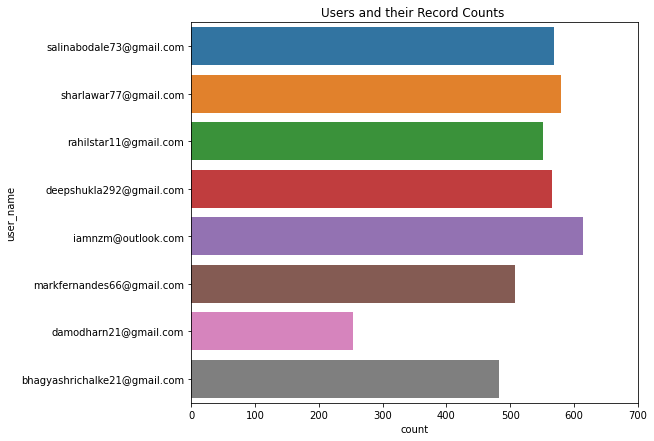

In [20]:
import seaborn as sns
from loghandler import logger
from matplotlib import pyplot as plt

try:
    df = df10.toPandas()
    plt.figure(figsize = (8,7))
    sns.barplot(x = 'count',y='user_name',data = df)
    plt.title('Users and their Record Counts ')
    plt.xlim(0,700)
    plt.show()
except Exception as e:
    logger.error(e)

# Plotting pie chart for  users and their record counts

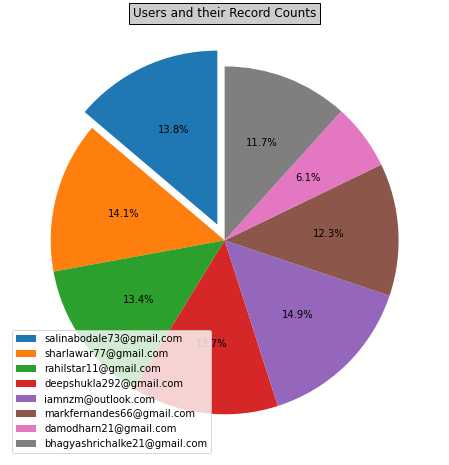

In [21]:
from matplotlib import pyplot as plt 
from loghandler import logger 
import pandas as pd

try:
    
    df =  df10.toPandas()
    user_data = df["user_name"]
    count_data = df["count"]

    fig = plt.figure(figsize=(8,8))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    # Plot
    plt.pie(count_data,autopct='%1.1f%%',startangle=90,explode=explode,)
    plt.title('Users and their Record Counts',bbox={'facecolor':'0.8', 'pad':4})
    plt.legend(user_data,loc="lower left")
   

except Exception as e:
    logger.error(e)


# Plotting bar chart for Avg Hours


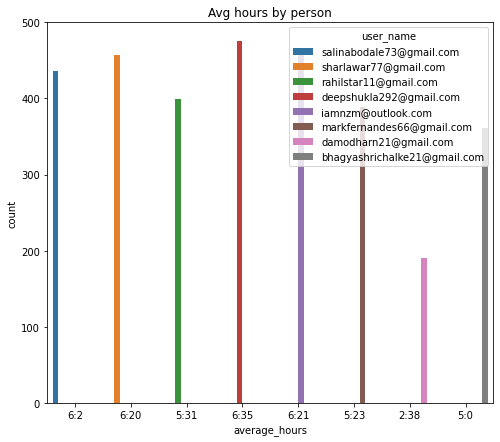

In [22]:
import seaborn as sns
from loghandler import logger
from matplotlib import pyplot as plt

try:
    df = highest_avg_hour.toPandas()
    plt.figure(figsize = (8,7))
    sns.barplot(x = 'average_hours',y='count',data = df,hue='user_name')
    plt.title("Avg hours by person")
    plt.ylim(0,500)
    plt.show()
except Exception as e:
    logger.error(e)


# Plotting pie chart for user idle hours


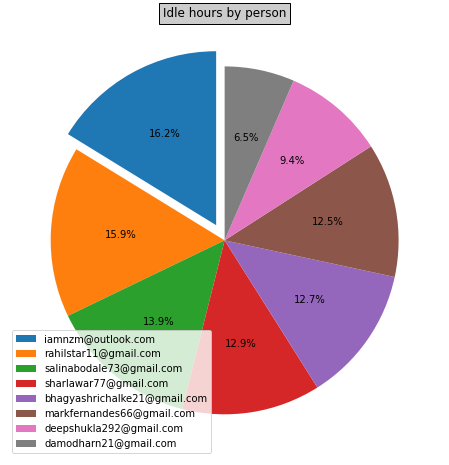

In [24]:
from matplotlib import pyplot as plt 
from loghandler import logger 
import pandas as pd

try:
    
    df =  idle_hour.toPandas()
    user_data = df["user_name"]
    count_data = df["count"]

    fig = plt.figure(figsize=(8,8))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    # Plot
    plt.pie(count_data,autopct='%1.1f%%',startangle=90,explode=explode,)
    plt.title("Idle hours by person",bbox={'facecolor':'0.8', 'pad':4})
    plt.legend(user_data,loc="lower left")
   

except Exception as e:
    logger.error(e)


# Plotting bar chart for with person name cound and idle hours


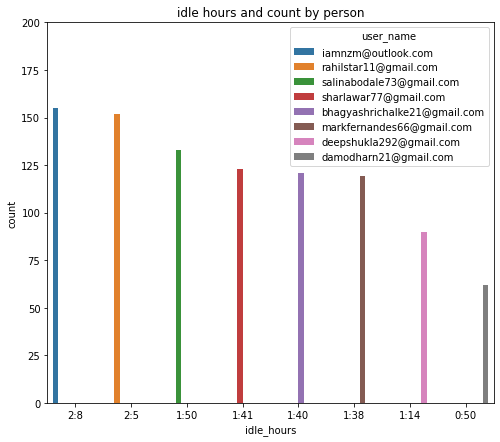

In [30]:
import seaborn as sns
from loghandler import logger
from matplotlib import pyplot as plt

try:
    df = idle_hour.toPandas()
    plt.figure(figsize = (8,7))
    sns.barplot(x = 'idle_hours',y='count',data = df,hue='user_name')
    plt.title("idle hours and count by person")
    plt.ylim(0,200)
    plt.show()
except Exception as e:
    logger.error(e)